In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)


In [ ]:
step = 1
N=20
Tp = 5

In [ ]:
t=np.arange(0,N)

#x=np.sin(0.02*t)+2*np.random.rand(N)
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df = pd.DataFrame(x)
df.head()

0
0  1
1  2
2  3
3  4
4  5

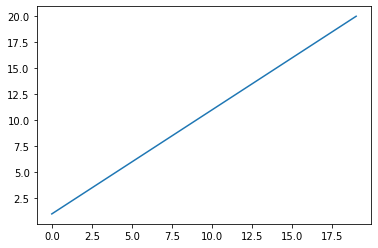

In [ ]:
plt.plot(df)
plt.show()

In [ ]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [ ]:
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [ ]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(5, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,259
Trainable params: 1,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX,trainY, epochs=100, batch_size=20, verbose=2,validation_data = (testX,testY))
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
1/1 - 2s - loss: 16.2722 - accuracy: 0.0000e+00 - val_loss: 209.5500 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 15.5773 - accuracy: 0.0000e+00 - val_loss: 203.9976 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 3/100
1/1 - 0s - loss: 15.1783 - accuracy: 0.0000e+00 - val_loss: 199.7125 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 4/100
1/1 - 0s - loss: 14.8619 - accuracy: 0.0000e+00 - val_loss: 196.0132 - val_accuracy: 0.0000e+00 - 36ms/epoch - 36ms/step
Epoch 5/100
1/1 - 0s - loss: 14.5843 - accuracy: 0.0000e+00 - val_loss: 192.5488 - val_accuracy: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 6/100
1/1 - 0s - loss: 14.3328 - accuracy: 0.0000e+00 - val_loss: 189.3413 - val_accuracy: 0.0000e+00 - 47ms/epoch - 47ms/step
Epoch 7/100
1/1 - 0s - loss: 14.0958 - accuracy: 0.0000e+00 - val_loss: 186.3168 - val_accuracy: 0.0000e+00 - 41ms/epoch - 41ms/step
Epoch 8/100
1/1 - 0s - loss: 13.8723 - accuracy: 0.0000e+00 - val_loss: 1

In [ ]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

[2.320364475250244, 0.0]


In [ ]:
df

0
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
9   10
10  11
11  12
12  13
13  14
14  15
15  16
16  17
17  18
18  19
19  20

In [ ]:
testPredict,testX

(array([[0.89045507],
        [0.8960859 ],
        [0.8996884 ],
        [0.9023755 ],
        [0.90465444],
        [0.90673006],
        [0.9086687 ],
        [0.91047925],
        [0.91215277],
        [0.91367966],
        [0.9150547 ],
        [0.91627866],
        [0.91735727],
        [0.9183    ],
        [0.9191179 ]], dtype=float32),
 array([[[ 6]],
 
        [[ 7]],
 
        [[ 8]],
 
        [[ 9]],
 
        [[10]],
 
        [[11]],
 
        [[12]],
 
        [[13]],
 
        [[14]],
 
        [[15]],
 
        [[16]],
 
        [[17]],
 
        [[18]],
 
        [[19]],
 
        [[20]]], dtype=int64))